<a href="https://colab.research.google.com/github/williamedwardhahn/ComplexSystems/blob/main/Complex_Systems_Lab_Wireworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from skimage import io as io
import matplotlib.pyplot as plt
from scipy import signal
import torch.nn.functional as F
from torch.nn.functional import *
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import time
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

In [3]:
def make_ani(A, colormap='gray'):

    fig, ax = plt.subplots()
    im = ax.imshow(A[0,:,:], cmap = colormap,interpolation="None");
    ax.axis('off')
    fig.set_size_inches(18, 18)
    plt.show()

    def animate(data, im):
        im.set_data(data)

    def step():
        for i in range(A.shape[0]):
            data = A[i,:,:]
            yield data

    return animation.FuncAnimation(fig, animate, step, interval=100, repeat=True, fargs=(im,))

In [4]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'magma')
    ax.axis('off')
    fig.set_size_inches(12, 12)
    plt.show()

In [5]:
def conv2(w,f): #GPU conv with padding

    n = conv2d(w.type(torch.int),f.type(torch.int))
    n = pad(n, (1, 1, 1, 1)) #add ones to the sides of the matrix

    return n

In [6]:
#Wireword Wire
#{empty=0 electron_head=1 electron_tail=2, wire=3}

In [9]:
w = np.zeros((100,100))
w[50,:] = 3
w[50,5] = 2
w[50,6] = 1

f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

steps = 1000
A = torch.zeros((steps,100,100)) # storage for frames for animation
w = torch.from_numpy(w)[None,None,:,:]
f = torch.from_numpy(f)[None,None,:,:]

In [10]:
for i in range(steps):
    
    n = w == 1
    
    n = conv2(n,f)

    w = 0*((w==0))                                    \
    +   2*((w==1))                                    \
    +   3*((w==2))                                    \
    +   3*((w==3)& ((n!=1) & (n!=2)))                 \
    +   1*((w==3)& ((n==1) | (n==2)))                 \
    
    A[i] = w

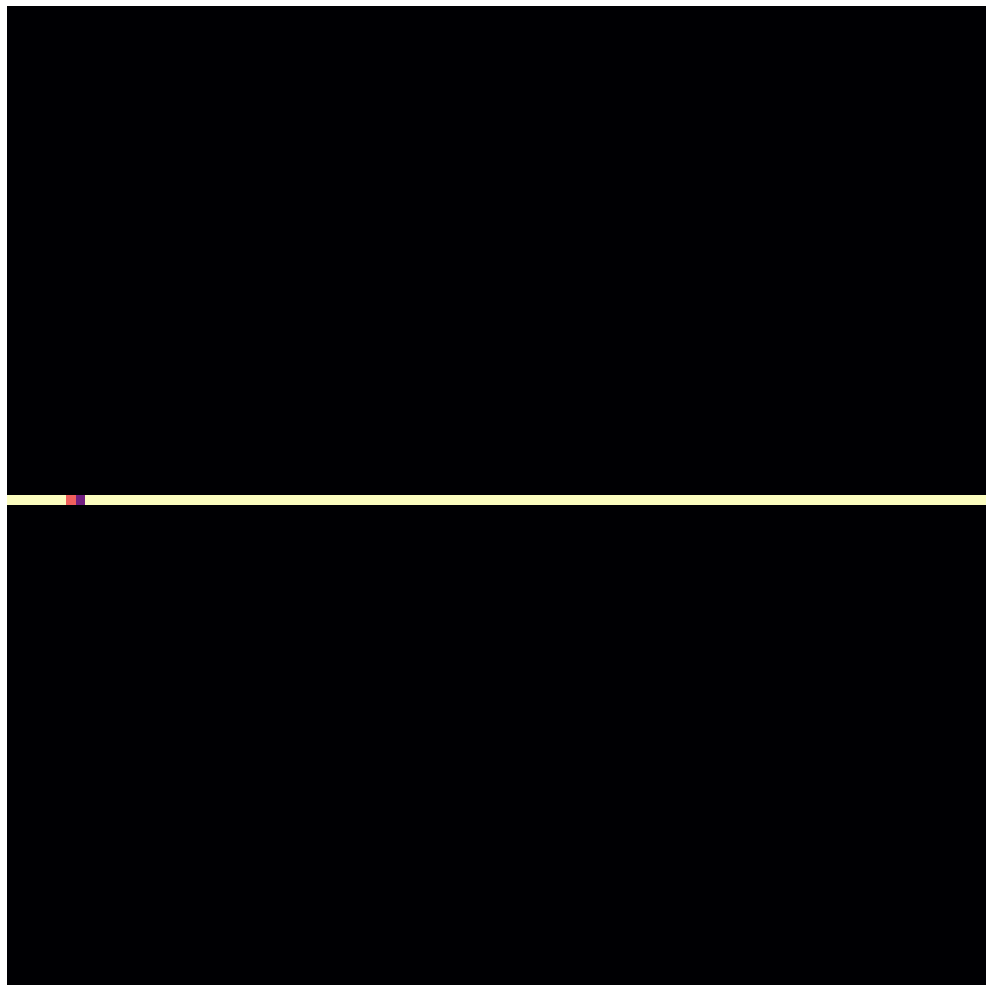

In [11]:
make_ani(A, colormap='magma')

In [12]:
#Wireworld Oscillator

In [13]:
w = np.zeros((100,100))
w[50,15:-1] = 3
w[48,5:15] = 3
w[52,5:15] = 3
w[49:52,4] = 3
w[49:52,15] = 3
w[52,14] = 1
w[52,13] = 2

f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

steps = 1000
A = torch.zeros((steps,100,100)) # storage for frames for animation
w = torch.from_numpy(w)[None,None,:,:]
f = torch.from_numpy(f)[None,None,:,:]

In [14]:
for i in range(steps):
    
    n = w == 1
    
    n = conv2(n,f)

    w = 0*((w==0))                                    \
    +   2*((w==1))                                    \
    +   3*((w==2))                                    \
    +   3*((w==3)& ((n!=1) & (n!=2)))                 \
    +   1*((w==3)& ((n==1) | (n==2)))                 \
    
    A[i] = w

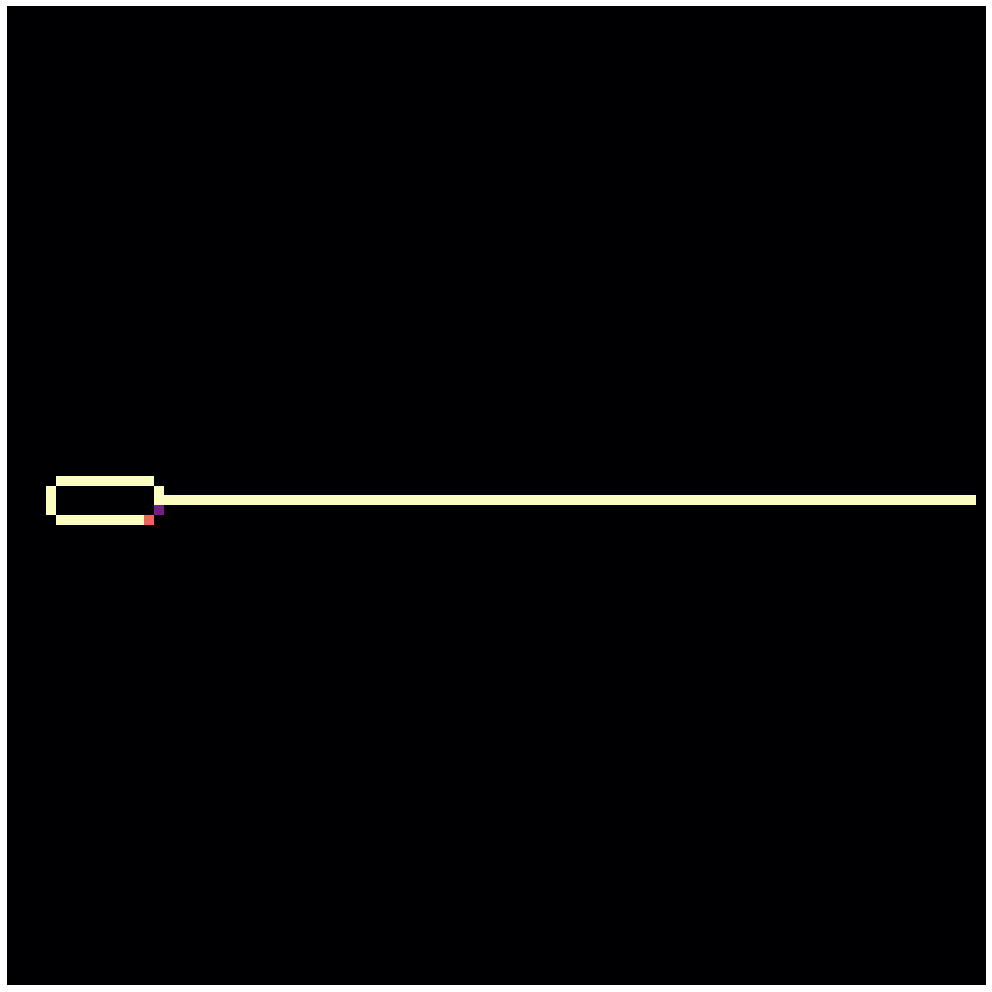

In [15]:
make_ani(A, colormap='magma')

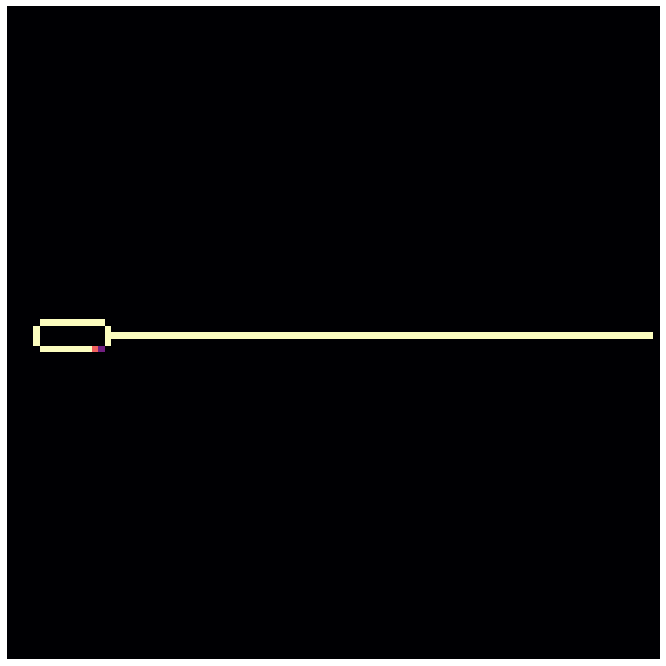

In [16]:
w = np.zeros((100,100))
w[50,15:-1] = 3
w[48,5:15] = 3
w[52,5:15] = 3
w[49:52,4] = 3
w[49:52,15] = 3
w[52,14] = 1
w[52,13] = 2
plot(w)

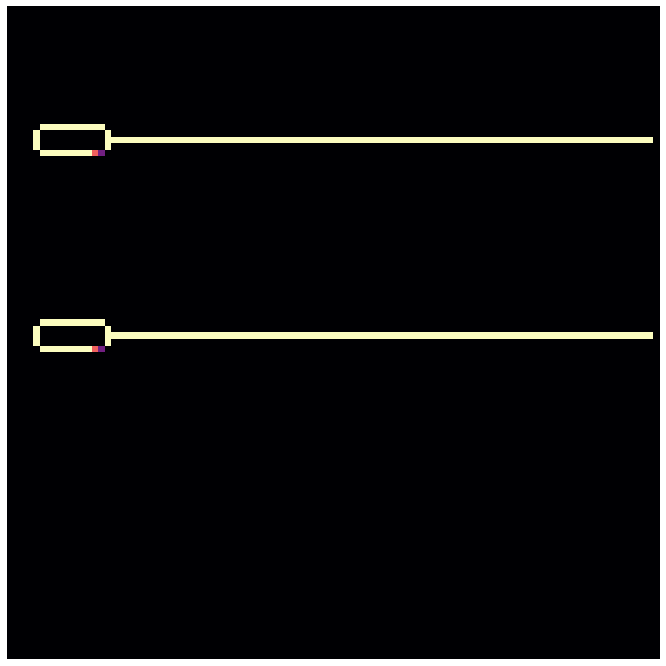

In [17]:
w = np.zeros((100,100))
w[50,15:-1] = 3
w[48,5:15] = 3
w[52,5:15] = 3
w[49:52,4] = 3
w[49:52,15] = 3


w[20,15:-1] = 3
w[18,5:15] = 3
w[22,5:15] = 3
w[19:22,4] = 3
w[19:22,15] = 3

w[22,14] = 1
w[22,13] = 2

w[52,14] = 1
w[52,13] = 2
plot(w)

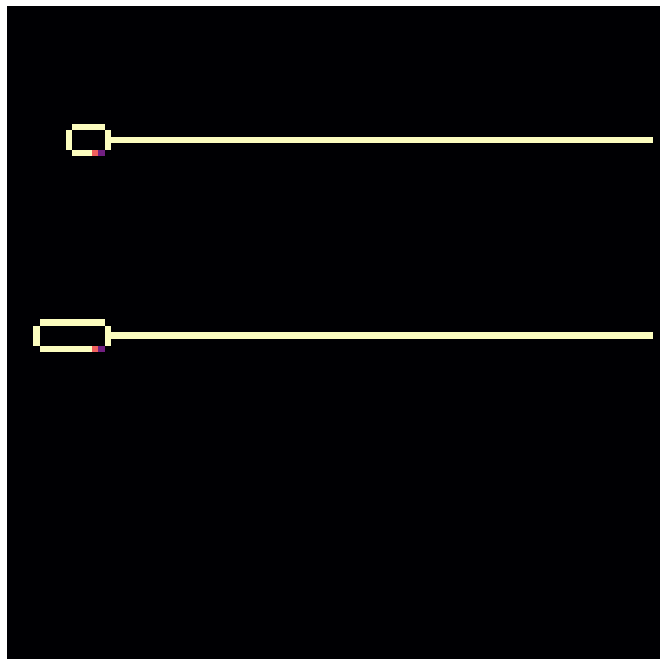

In [18]:
w = np.zeros((100,100))
w[50,15:-1] = 3
w[48,5:15] = 3
w[52,5:15] = 3
w[49:52,4] = 3
w[49:52,15] = 3


w[20,15:-1] = 3
w[18,10:15] = 3
w[22,10:15] = 3
w[19:22,9] = 3
w[19:22,15] = 3

w[22,14] = 1
w[22,13] = 2

w[52,14] = 1
w[52,13] = 2
plot(w)

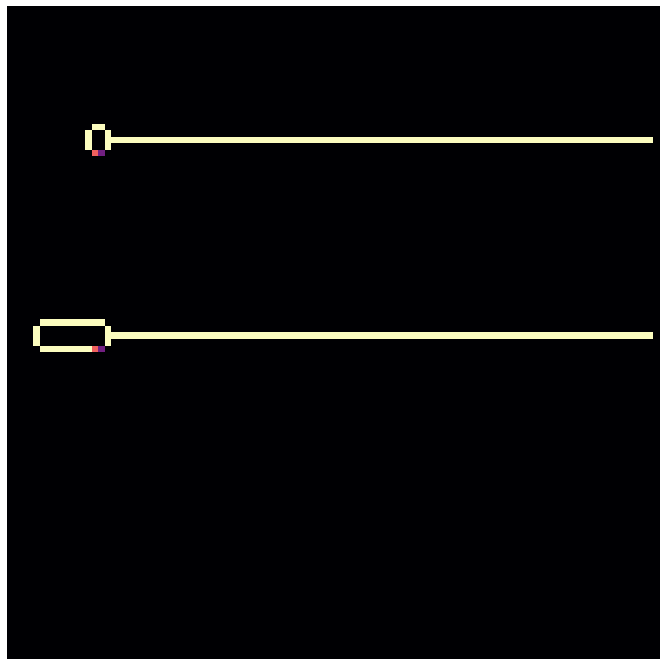

In [19]:
w = np.zeros((100,100))
w[50,15:-1] = 3
w[48,5:15] = 3
w[52,5:15] = 3
w[49:52,4] = 3
w[49:52,15] = 3


w[20,15:-1] = 3
w[18,13:15] = 3
w[22,13:15] = 3
w[19:22,12] = 3
w[19:22,15] = 3

w[22,14] = 1
w[22,13] = 2

w[52,14] = 1
w[52,13] = 2
plot(w)

In [20]:
f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

steps = 1000
A = torch.zeros((steps,100,100)) # storage for frames for animation
w = torch.from_numpy(w)[None,None,:,:]
f = torch.from_numpy(f)[None,None,:,:]

In [21]:
for i in range(steps):
    
    n = w == 1
    
    n = conv2(n,f)

    w = 0*((w==0))                                    \
    +   2*((w==1))                                    \
    +   3*((w==2))                                    \
    +   3*((w==3)& ((n!=1) & (n!=2)))                 \
    +   1*((w==3)& ((n==1) | (n==2)))                 \
    
    A[i] = w

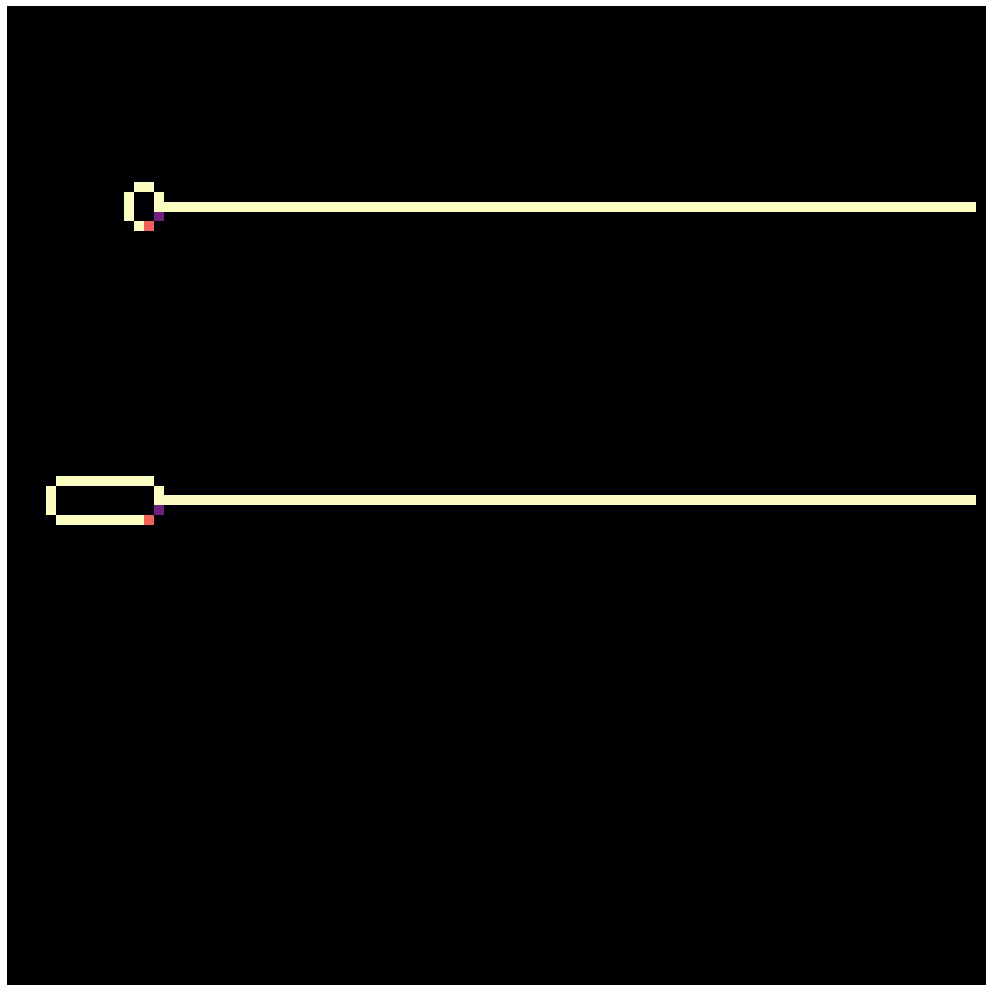

In [22]:
make_ani(A, colormap='magma')

In [23]:
# https://www.quinapalus.com/wi-index.html

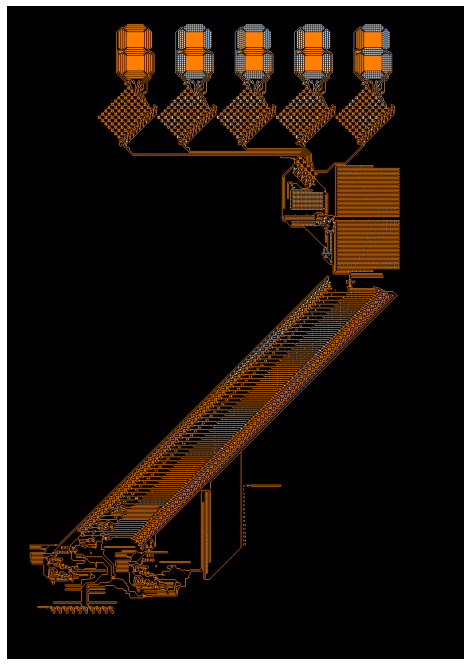

In [24]:
image = io.imread("https://github.com/williamedwardhahn/ComplexSystems/raw/main/primes.png")
plot(image)

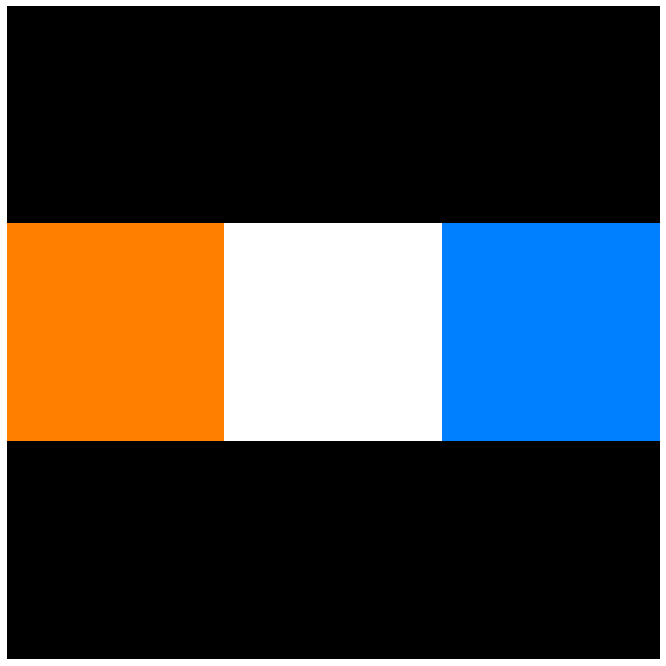

In [25]:
plot(image[464:467,503:506])

In [26]:
np.prod(image[464:467,503:506] == (255, 128, 0),2)

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 0]])

In [27]:
#Wireword Wire
empty=0 
electron_head=1
electron_tail=2
wire=3

In [28]:
wire_color = (255, 128, 0) 
head_color = (0, 128, 255)  
tail_color = (255, 255, 255)

In [29]:
wires = np.prod(image == wire_color,2)
heads = np.prod(image == head_color,2)
tails = np.prod(image == tail_color,2)

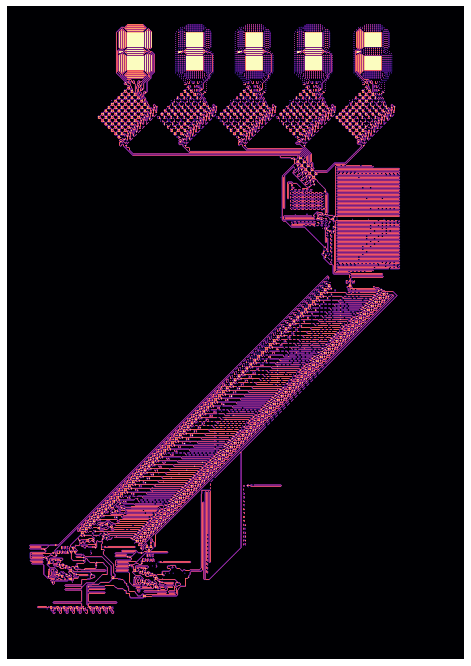

In [30]:
plot(wires)

In [31]:
program = np.zeros((image.shape[0],image.shape[1]))

In [32]:
program[np.where(wires)] = wire
program[np.where(heads)] = electron_head
program[np.where(tails)] = electron_tail

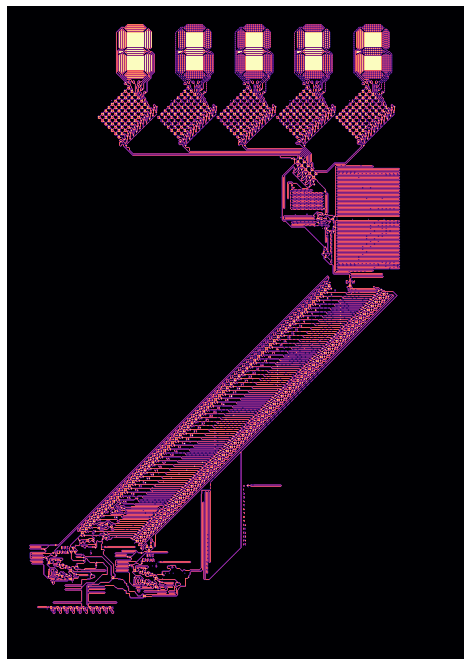

In [33]:
plot(program)

In [34]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'magma',interpolation="None")
    ax.axis('off')
    fig.set_size_inches(18, 18)
    plt.show()

In [35]:
def conv2(w,f): #GPU conv with padding

    n = conv2d(w.type(torch.float16),f.type(torch.float16))
    n = pad(n, (1, 1, 1, 1)) #add ones to the sides of the matrix

    return n

In [36]:
w = program

f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

steps = 2000
skip = 1000
A = torch.zeros((steps,w.shape[0],w.shape[1])).cuda() # storage for frames for animation
w = torch.from_numpy(w)[None,None,:,:].cuda()
f = torch.from_numpy(f)[None,None,:,:].cuda()

In [ ]:
j = 0 
for i in range(steps*skip):
    
    n = w == 1
    
    n = conv2(n,f)

    w = 0*((w==0))                                    \
    +   2*((w==1))                                    \
    +   3*((w==2))                                    \
    +   3*((w==3)& ((n!=1) & (n!=2)))                 \
    +   1*((w==3)& ((n==1) | (n==2)))                 \
    
    if i % skip == 1:
        A[j] = w
        j +=1
        print(j)
        # plot(w.cpu().numpy()[0,0])

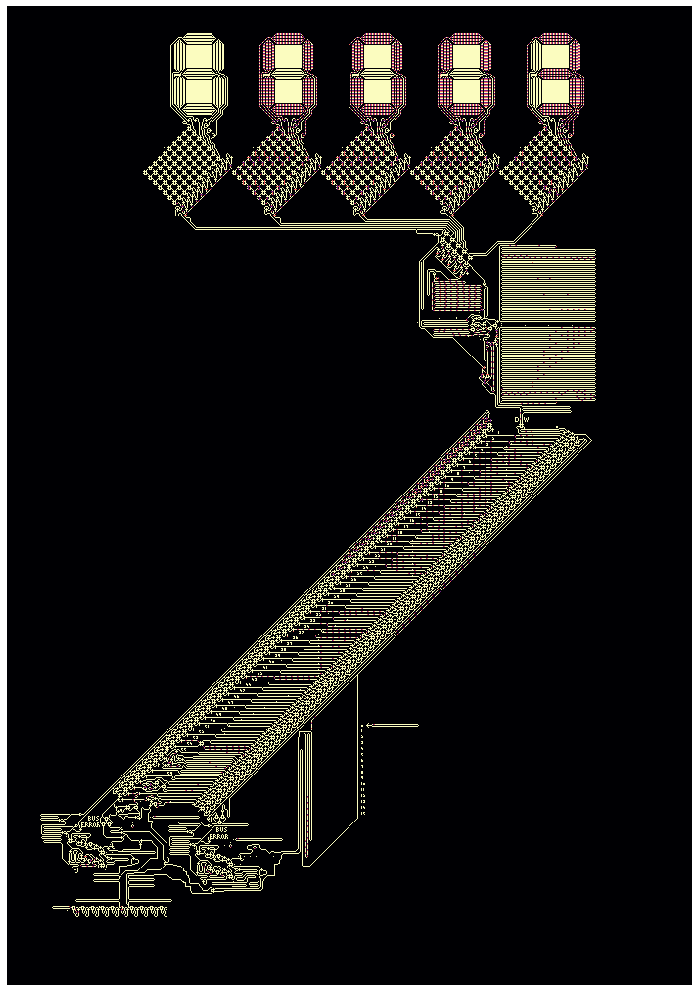

In [38]:
make_ani(A.cpu().numpy(), colormap='magma')